#### Question: Does customer churn depend on the customer contract segment ?

##### Expectations:
The result of the analysis helps to identify the impact of contract segment on customer churn. Understanding this relationship can help the telecommunications company to tailor their strategies and offers to specific contract segments to improve customer retention rates.

Using a chi-square test of independence to analyze the relationship between customer churn and contract segment is appropriate as it helps to determine if there is a statistically significant association between the two variables. This analysis can provide insights into whether the customer contract segment is a significant predictor of customer churn, which can help the company to focus their efforts on retaining customers in specific contract segments where churn rates are highest.

##### Information about the data:
The data is stored in an Excel file named `Telco_customer_churn.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The features we are interested in are:
- `Contract`: Type of contract (Month-to-month, One year, Two year)
- `Churn Value`: Whether the customer churned or not (1 for yes and 0 for no)

#### EDA

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import t

In [2]:
# read the dataset
dataset = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [3]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [4]:
# taking only the required columns which are Contract and Churn Value
dataset = dataset[['Contract','Churn Value']]

<AxesSubplot:ylabel='Churn Value'>

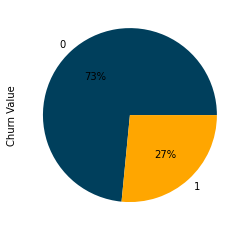

In [9]:
# visualizing the distribution of the target variable using a pie chart
dataset['Churn Value'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["#003f5c", "#ffa600"])


<AxesSubplot:ylabel='Contract'>

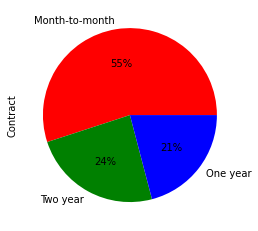

In [8]:
# visualizing the distribution of the contract type using a pie chart
dataset['Contract'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green", "blue"])


<AxesSubplot:xlabel='Contract', ylabel='count'>

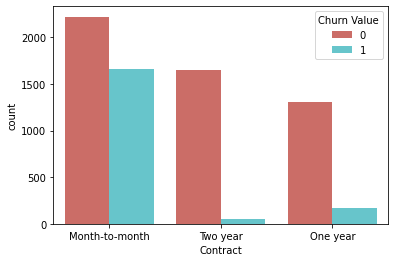

In [6]:
# visualizing the distribution of the target variable with respect to Contract
sns.countplot(x='Contract', data=dataset, palette='hls', hue='Churn Value')

In [10]:
# checking for null values
dataset.isnull().sum()

Contract       0
Churn Value    0
dtype: int64

In [11]:
dataset.dtypes

Contract       object
Churn Value     int64
dtype: object

In [12]:
# converting the categorical values to numerical values
data = dataset.copy()
data['Contract'] = data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})

In [24]:
# check the correlation between the features
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Contract,Churn Value
Contract,1.000000,-0.396713
Churn Value,-0.396713,1.000000


In [18]:
# Correlation with Spearman's Rank Correlation:
corr = data.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,Contract,Churn Value
Contract,1.000000,-0.406262
Churn Value,-0.406262,1.000000


In [19]:
# Correlation with Kendall's Rank Correlation:
corr = data.corr(method='kendall')
corr.style.background_gradient(cmap='coolwarm')

,Contract,Churn Value
Contract,1.000000,-0.386912
Churn Value,-0.386912,1.000000


In [20]:
# separate each category of contract type with its churn value
month_to_month = dataset[dataset['Contract'] == 'Month-to-month']
one_year = dataset[dataset['Contract'] == 'One year']
two_year = dataset[dataset['Contract'] == 'Two year']

##### Initial observations:
It is clear that `Contract` variable has negative correlation with `Churn Value` variable.
So this is a good indicator that contract type/segement is a good predictor of churn. In other words, customers churn depends on the contract type, but we need to do a statistical test to confirm this.

### Model building

##### Defining Hypothesises:
- Null Hypothesis: Customer segemnts are independent of churn
- Alternate Hypothesis: Customer segemnts are dependent of churn

##### Statistical test:
- we will use `Chi-square test of independence` to test the hypothesis.
- We will use `0.05` as the significance level.

In [21]:
# apply chi-square test to check if there is any relationship between contract type and churn value
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(dataset['Contract'], dataset['Churn Value']))

print('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))
print('Degrees of freedom %d' % dof)
print('Expected values ', expected)


Chi-square statistic 1184.597 p_value 0.000
Degrees of freedom 2
Expected values  [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]


In [25]:
alpha = 0.05
if p <= alpha:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


### we managed to reject the null hypothesis and conclude that customer churn is dependent of customer segements.